In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("C:\\Users\\PAVANI\\Downloads\\default of credit card clients.xls - Data.csv")

In [3]:
df.columns = df.iloc[0]

# Using DataFrame.rename()
df2 = df.rename(columns=df.iloc[1])

# Convert row to header and remove the row
df2 = df.rename(columns=df.iloc[0]).loc[1:]

# Using DataFrame.rename() to convert row to column header
df.rename(columns=df.iloc[1], inplace = True)

# Using DataFrame.values[]
header_row = df.iloc[0]
df2 = pd.DataFrame(df.values[1:], columns=header_row)

In [4]:
df2.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df2 = df2.rename({'default payment next month': 'default_payment_next_month'}, axis=1)

In [6]:
df2.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default_payment_next_month    object
dtype: object

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df2.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default_payment_next_month    object
dtype: object

In [9]:
df2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


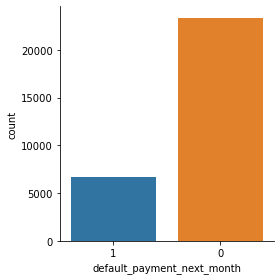

In [10]:
sns.catplot(x = "default_payment_next_month",data= df2,kind="count",height=4,aspect=1)

In [11]:
df2 = df2.astype({'PAY_0':'float'})
df2 = df2.astype({'PAY_2':'float'})
df2 = df2.astype({'PAY_3':'float'})
df2 = df2.astype({'PAY_4':'float'})
df2 = df2.astype({'PAY_5':'float'})
df2 = df2.astype({'PAY_6':'float'})
df2 = df2.astype({'BILL_AMT1':'float'})
df2 = df2.astype({'BILL_AMT2':'float'})
df2 = df2.astype({'BILL_AMT3':'float'})
df2 = df2.astype({'BILL_AMT4':'float'})
df2 = df2.astype({'BILL_AMT5':'float'})
df2 = df2.astype({'BILL_AMT6':'float'})
df2.dtypes

0
ID                             object
LIMIT_BAL                      object
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                            object
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                       object
PAY_AMT2                       object
PAY_AMT3                       object
PAY_AMT4                       object
PAY_AMT5                       object
PAY_AMT6                       object
default_payment_next_month     object
dtype: object

In [12]:
df2['payment_score']=df2['PAY_0']+df2['PAY_2']+df2['PAY_3']+df2['PAY_4']+df2['PAY_5']+df2['PAY_6']
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_score
0,1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0,689,0,0,0,0,1,-2.0
1,2,120000,2,2,2,26,-1.0,2.0,0.0,0.0,...,3455.0,3261.0,0,1000,1000,1000,0,2000,1,3.0
2,3,90000,2,2,2,34,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000,36681,10000,9000,689,679,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500,20000,5003,3047,5000,1000,0,0.0
29996,29997,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,...,5190.0,0.0,1837,3526,8998,129,0,0,0,-4.0
29997,29998,30000,1,2,2,37,4.0,3.0,2.0,-1.0,...,20582.0,19357.0,0,0,22000,4200,2000,3100,1,8.0
29998,29999,80000,1,3,1,41,1.0,-1.0,0.0,0.0,...,11855.0,48944.0,85900,3409,1178,1926,52964,1804,1,-1.0


In [13]:
df2['bill_amt_score'] =df2['payment_score']*df2[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_score,bill_amt_score
0,1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0,689,0,0,0,0,1,-2.0,-2568.000000
1,2,120000,2,2,2,26,-1.0,2.0,0.0,0.0,...,3261.0,0,1000,1000,1000,0,2000,1,3.0,8538.500000
2,3,90000,2,2,2,34,0.0,0.0,0.0,0.0,...,15549.0,1518,1500,1000,1000,1000,5000,0,0.0,0.000000
3,4,50000,2,2,1,37,0.0,0.0,0.0,0.0,...,29547.0,2000,2019,1200,1100,1069,1000,0,0.0,0.000000
4,5,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,...,19131.0,2000,36681,10000,9000,689,679,0,-2.0,-36446.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0.0,0.0,0.0,0.0,...,15980.0,8500,20000,5003,3047,5000,1000,0,0.0,0.000000
29996,29997,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,...,0.0,1837,3526,8998,129,0,0,0,-4.0,-14121.333333
29997,29998,30000,1,2,2,37,4.0,3.0,2.0,-1.0,...,19357.0,0,0,22000,4200,2000,3100,1,8.0,93994.666667
29998,29999,80000,1,3,1,41,1.0,-1.0,0.0,0.0,...,48944.0,85900,3409,1178,1926,52964,1804,1,-1.0,-44435.166667


In [14]:
X=df2.drop(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                         'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                         'default_payment_next_month'],axis=1)
y=df2.default_payment_next_month


X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (24000, 14)
Input Test: (6000, 14)
Output Training: (24000,)
Output Test: (6000,)


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', C=1, penalty='l1',solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [16]:
y_pred
logreg.score(X_test,y_test)

0.6833333333333333

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [18]:
y_pred
dt.score(X_test,y_test)

0.7153333333333334